# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [333]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,AverageFilterBedVolume,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,TotalEBCT,Footprint,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,NaN,57.886530,Cascade,1.880000,1.388889,NaN,143.341204,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,15.217089,63.521586,Air injection,1.620000,11.204508,33.20,16.714412,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,28.970630,64.908486,Bottom aeration,2.213333,3.935020,28.97,44.693822,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,NaN,NaN,Cascade,2.073333,NaN,NaN,194.588021,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,NaN,NaN,Cascade,1.313333,NaN,NaN,412.300024,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,60.686602,91.698648,Cascade,1.546667,5.242647,40.86,24.106636,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,19.339643,89.405620,Passive plate aerator,2.133333,6.912876,16.49,22.050800,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,25.079249,19.331598,Bottom aeration,1.673333,2.824380,36.11,209.076387,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,NaN,NaN,Cascade,2.200000,NaN,NaN,152.513970,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

#### Decided to go with > 40% missing values

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.

In [334]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# filter out the identifier column
df = df.drop(columns=['WaterworksName'], errors='ignore')

# calculate missing values percentage
missing_percentage = df.isna().mean() * 100
print("Missing values percentage per column:\n", missing_percentage)

# columns with > 40% missing data
high_missing_columns = missing_percentage[missing_percentage > 40].index
print("Columns with > 40% missing data:", list(high_missing_columns))

# drop columns with too many missing values
df = df.drop(columns=high_missing_columns)

# scale numeric data (only numeric columns)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

Missing values percentage per column:
 TotalFilters                  0.000000
MaxTypicalFlow               20.253165
AverageFilterArea             5.063291
AverageTypicalRunVolume       2.531646
AverageBackwashVolume        12.658228
PrimaryTrigger                0.000000
AverageTotalFilterDepth      41.772152
OverallFilterGrainSizeMin    43.037975
OverallFilterGrainSizeMax    43.037975
AverageFilterBedVolume       43.037975
FilterExploitation           20.253165
AerationType                  0.000000
OxygenFactor                  0.000000
Stage1HLR                    26.582278
TotalEBCT                    49.367089
Footprint                     5.063291
SumOfld_layer                49.367089
UniformityCoefficient        64.556962
UFRV                          8.860759
BW%                          16.455696
HLR_BW                       34.177215
TankCapacity                  5.063291
TankExploitation             37.974684
GravityPressureMixed          0.000000
Stages                   

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,0.263158,0.030645,0.100245,0.078884,0.054519,Time,0.416917,Cascade,0.610390,0.038377,0.306610,0.758179,0.009651,NaN,0.263365,NaN,Gravity,Single,0.021561
1,0.157895,0.072913,0.076834,0.000797,0.161185,Volume,0.472130,Air injection,0.399351,0.686409,0.018993,0.000000,0.649245,0.445406,0.000000,NaN,Pressure,Double,0.052881
2,0.157895,0.079958,0.300703,0.056574,0.488889,Volume,0.485718,Bottom aeration,0.880952,0.206473,0.082545,0.191375,0.059990,0.478478,0.205094,NaN,Gravity,Double,0.059015
3,0.052632,NaN,0.314779,0.015139,0.149333,Volume,NaN,Cascade,0.767316,NaN,0.423011,0.031447,0.059277,NaN,0.106313,NaN,Gravity,Single,0.013128
4,0.052632,NaN,0.003597,0.000000,0.021926,Volume,NaN,Cascade,0.150433,NaN,0.917517,0.116106,0.049401,NaN,0.528936,NaN,Gravity,Single,0.000000


### Impute missing values with median

-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?

In [335]:
from sklearn.impute import SimpleImputer

# numeric imputation with median values
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

print("Remaining missing values per column after imputation:\n", df.isna().sum())



Remaining missing values per column after imputation:
 TotalFilters               0
MaxTypicalFlow             0
AverageFilterArea          0
AverageTypicalRunVolume    0
AverageBackwashVolume      0
PrimaryTrigger             0
FilterExploitation         0
AerationType               0
OxygenFactor               0
Stage1HLR                  0
Footprint                  0
UFRV                       0
BW%                        0
HLR_BW                     0
TankCapacity               0
TankExploitation           0
GravityPressureMixed       0
Stages                     0
AbstractedVolume           0
dtype: int64


### One-hot encode and Ordinal encoding

-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?

In [336]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# one-hot encode
one_hot_columns = ["PrimaryTrigger", "AerationType", "GravityPressureMixed"]
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)  # drop_first avoids multicollinearity

# ordinal encoding with custom mapping
stages_mapping = {"Single": 1, "Double": 2, "Triple": 3, "Mixed": 4}
df["Stages"] = df["Stages"].map(stages_mapping)


df.head()

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,Stages,AbstractedVolume,PrimaryTrigger_Time,PrimaryTrigger_Volume,PrimaryTrigger_Waterlevel above filter,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,0.263158,0.030645,0.100245,0.078884,0.054519,0.416917,0.610390,0.038377,0.306610,0.758179,0.009651,0.450317,0.263365,0.202788,1,0.021561,True,False,False,False,True,False,False,False,False,False,False,False
1,0.157895,0.072913,0.076834,0.000797,0.161185,0.472130,0.399351,0.686409,0.018993,0.000000,0.649245,0.445406,0.000000,0.202788,2,0.052881,False,True,False,False,False,False,False,False,False,False,False,True
2,0.157895,0.079958,0.300703,0.056574,0.488889,0.485718,0.880952,0.206473,0.082545,0.191375,0.059990,0.478478,0.205094,0.202788,2,0.059015,False,True,False,True,False,False,False,False,False,False,False,False
3,0.052632,0.079958,0.314779,0.015139,0.149333,0.469758,0.767316,0.193763,0.423011,0.031447,0.059277,0.450317,0.106313,0.202788,1,0.013128,False,True,False,False,True,False,False,False,False,False,False,False
4,0.052632,0.079958,0.003597,0.000000,0.021926,0.469758,0.150433,0.193763,0.917517,0.116106,0.049401,0.450317,0.528936,0.202788,1,0.000000,False,True,False,False,True,False,False,False,False,False,False,False


### Outliers

-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.

In [337]:
import numpy as np

# number of rows
total_rows = len(df)

# store columns with outlier percentages
outlier_columns = {}

# calculate the % of outliers
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    below_outliers_pct = (df[col] < lower_bound).mean() * 100
    above_outliers_pct = (df[col] > upper_bound).mean() * 100
    total_outliers_pct = below_outliers_pct + above_outliers_pct

    # outlier percentages
    outlier_columns[col] = {
        'Below (%)': below_outliers_pct,
        'Above (%)': above_outliers_pct,
        'Total (%)': total_outliers_pct
    }

    # remove columns with > 25% total outliers
    if total_outliers_pct > 25:
        df = df.drop(columns=[col])

outlier_percentages_df = pd.DataFrame(outlier_columns).T
print("Outlier percentages per column:\n", outlier_percentages_df)

# check outliers %
outlier_percentages_after = {}

# calculate again the % of outliers
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    below_outliers_pct = (df[col] < lower_bound).mean() * 100
    above_outliers_pct = (df[col] > upper_bound).mean() * 100
    total_outliers_pct = below_outliers_pct + above_outliers_pct

    outlier_percentages_after[col] = {
        'Below (%)': below_outliers_pct,
        'Above (%)': above_outliers_pct,
        'Total (%)': total_outliers_pct
    }

outlier_percentages_after_df = pd.DataFrame(outlier_percentages_after).T
print("\nOutlier percentages per column after handling:\n", outlier_percentages_after_df)


Outlier percentages per column:
                          Below (%)  Above (%)  Total (%)
TotalFilters              0.000000   5.063291   5.063291
MaxTypicalFlow            0.000000  12.658228  12.658228
AverageFilterArea         0.000000   3.797468   3.797468
AverageTypicalRunVolume   0.000000   8.860759   8.860759
AverageBackwashVolume     0.000000  11.392405  11.392405
FilterExploitation        0.000000   1.265823   1.265823
OxygenFactor              5.063291   0.000000   5.063291
Stage1HLR                 0.000000  13.924051  13.924051
Footprint                 0.000000   6.329114   6.329114
UFRV                      0.000000   3.797468   3.797468
BW%                       0.000000  11.392405  11.392405
HLR_BW                   16.455696  20.253165  36.708861
TankCapacity              0.000000   3.797468   3.797468
TankExploitation          8.860759  18.987342  27.848101
AbstractedVolume          0.000000   8.860759   8.860759

Outlier percentages per column after handling:
       

### Correlation matrix

-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.

##### Seems like MaxTypicalFlow and AbstractedVolume correlate, the lower the MaxTypicalFlow the lower AbstractedVolume is, the same to higher
##### I decided to drop MaxTypicalFlow, because I think it would be usefull in case the data would be used to do analisys 

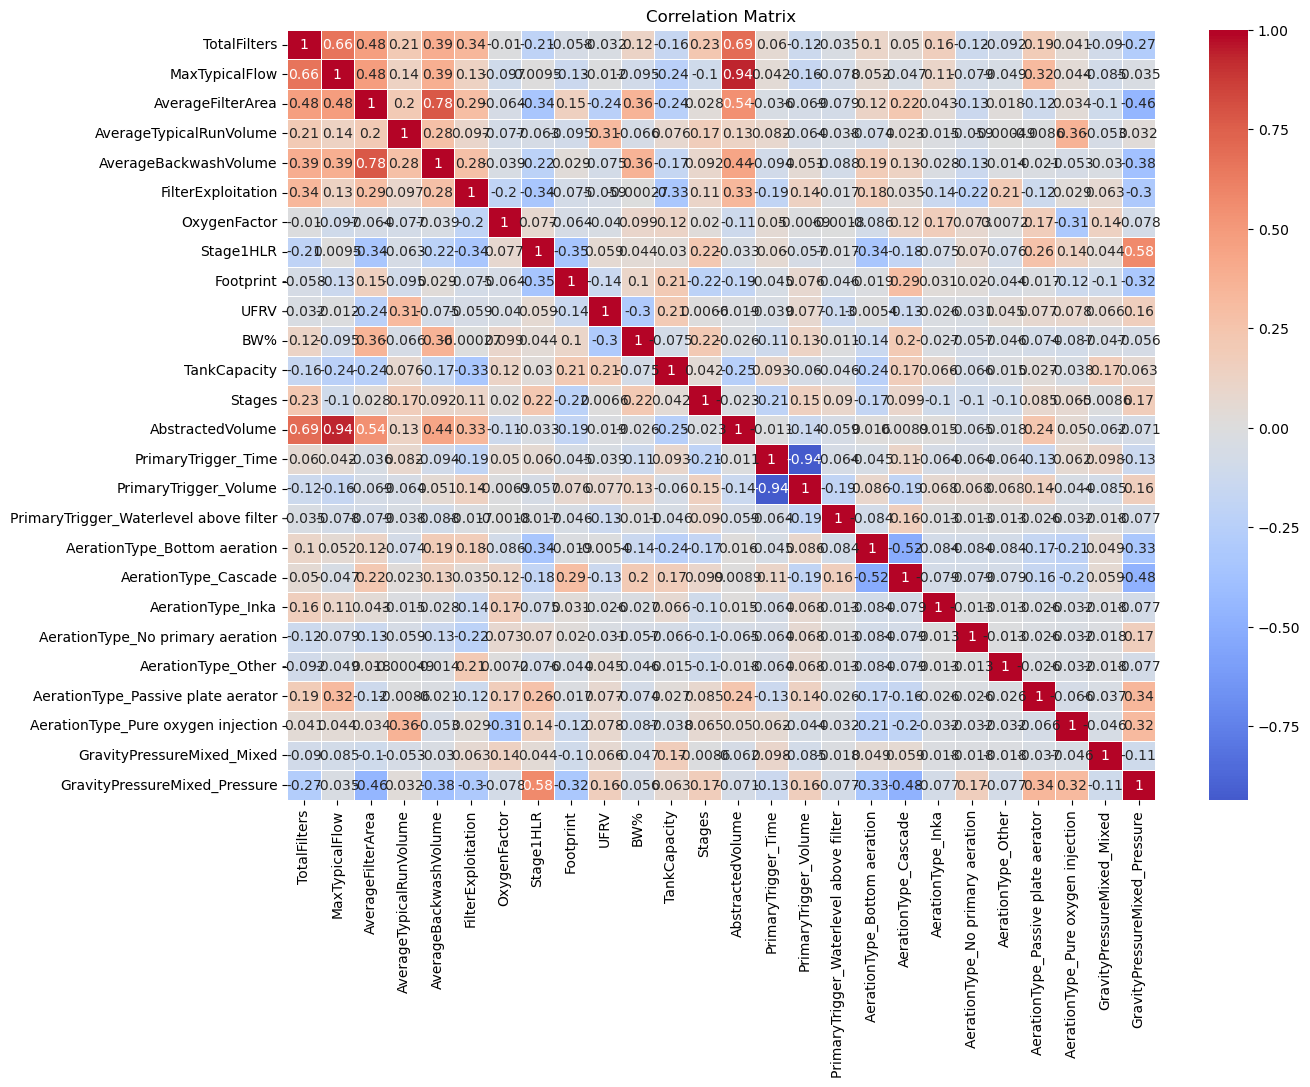

    MaxTypicalFlow  AbstractedVolume
0         0.030645          0.021561
1         0.072913          0.052881
2         0.079958          0.059015
3         0.079958          0.013128
4         0.079958          0.000000
..             ...               ...
74        1.000000          1.000000
75        0.986819          0.962179
76        0.171539          0.036395
77        0.079958          0.132353
78        0.227841          0.061627

[79 rows x 2 columns]
Correlation between Feature1 and Feature2: 0.9366573526427941


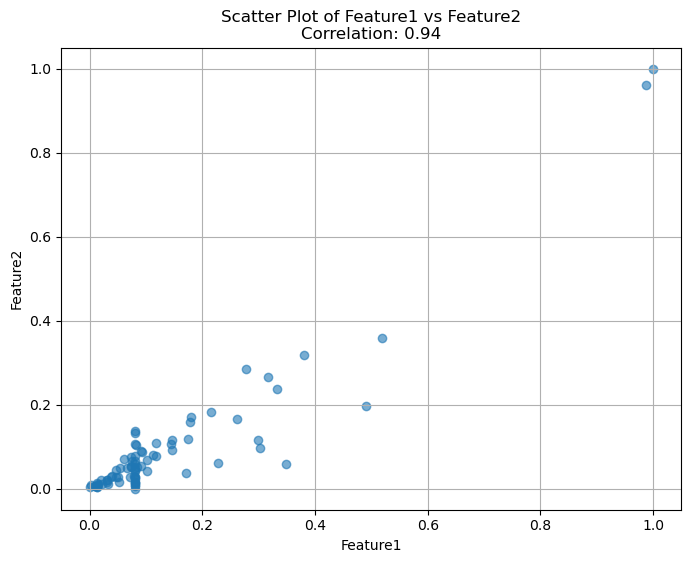

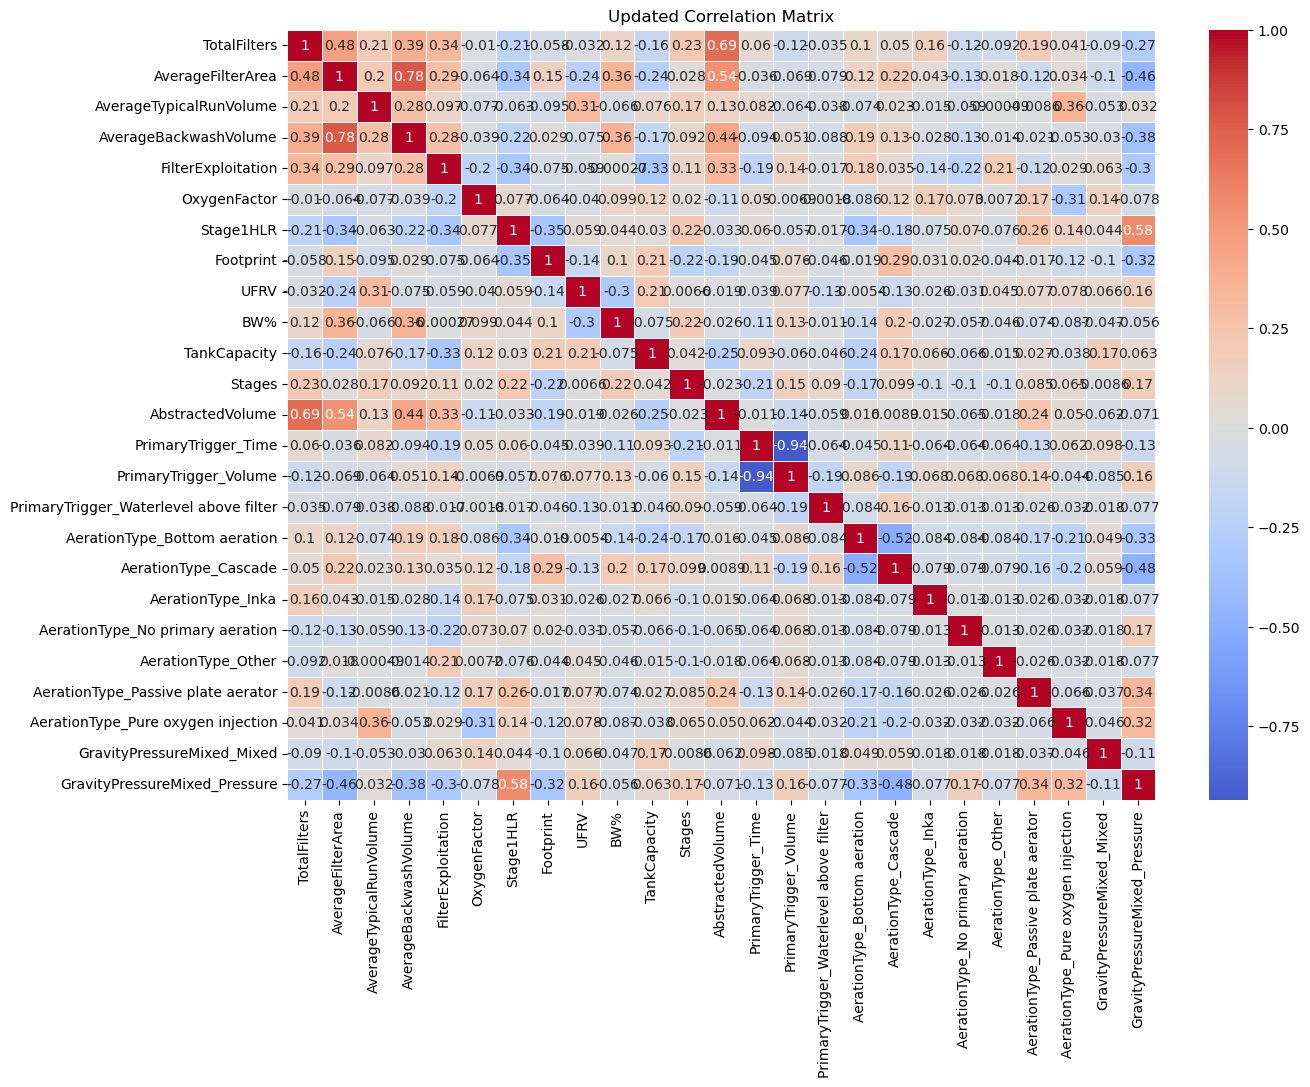

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

feature_comparison = df[['MaxTypicalFlow', 'AbstractedVolume']]
print(feature_comparison)

# correlation between the two features
correlation_value = df['MaxTypicalFlow'].corr(df['AbstractedVolume'])
print(f"Correlation between Feature1 and Feature2: {correlation_value}")

plt.figure(figsize=(8, 6))
plt.scatter(df['MaxTypicalFlow'], df['AbstractedVolume'], alpha=0.6)
plt.title(f"Scatter Plot of Feature1 vs Feature2\nCorrelation: {correlation_value:.2f}")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.grid(True)
plt.show()

# drop highly correlated column
df = df.drop(columns=['MaxTypicalFlow'])

# correlation between the two features after dropping columns
updated_correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Updated Correlation Matrix")
plt.show()

### Feature transformation

- Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.

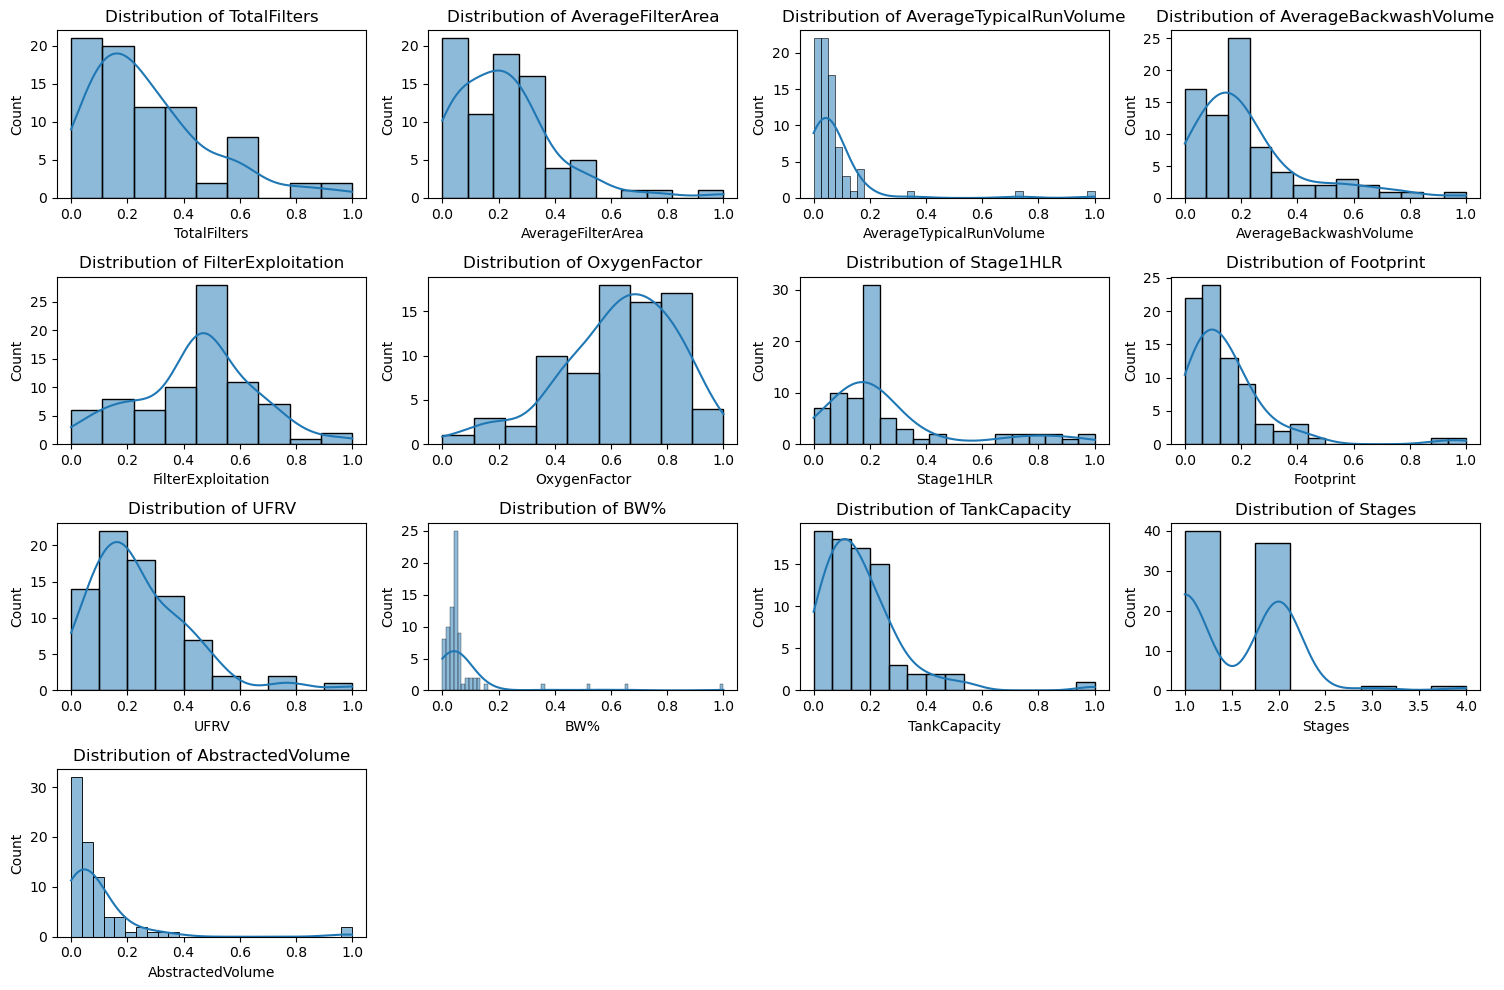

Skewness of features:
 TotalFilters               1.265909
AverageFilterArea          1.577949
AverageTypicalRunVolume    5.150083
AverageBackwashVolume      1.754944
FilterExploitation        -0.020987
OxygenFactor              -0.763642
Stage1HLR                  1.733131
Footprint                  3.161593
UFRV                       1.610795
BW%                        4.881985
TankCapacity               2.752520
Stages                     0.995743
AbstractedVolume           4.395703
dtype: float64

Skewed features (absolute skewness > 1): ['TotalFilters', 'AverageFilterArea', 'AverageTypicalRunVolume', 'AverageBackwashVolume', 'Stage1HLR', 'Footprint', 'UFRV', 'BW%', 'TankCapacity', 'AbstractedVolume']
Square root transformed TotalFilters
Square root transformed AverageFilterArea
Square root transformed AverageTypicalRunVolume
Square root transformed AverageBackwashVolume
Square root transformed Stage1HLR
Square root transformed Footprint
Square root transformed UFRV
Square root tra

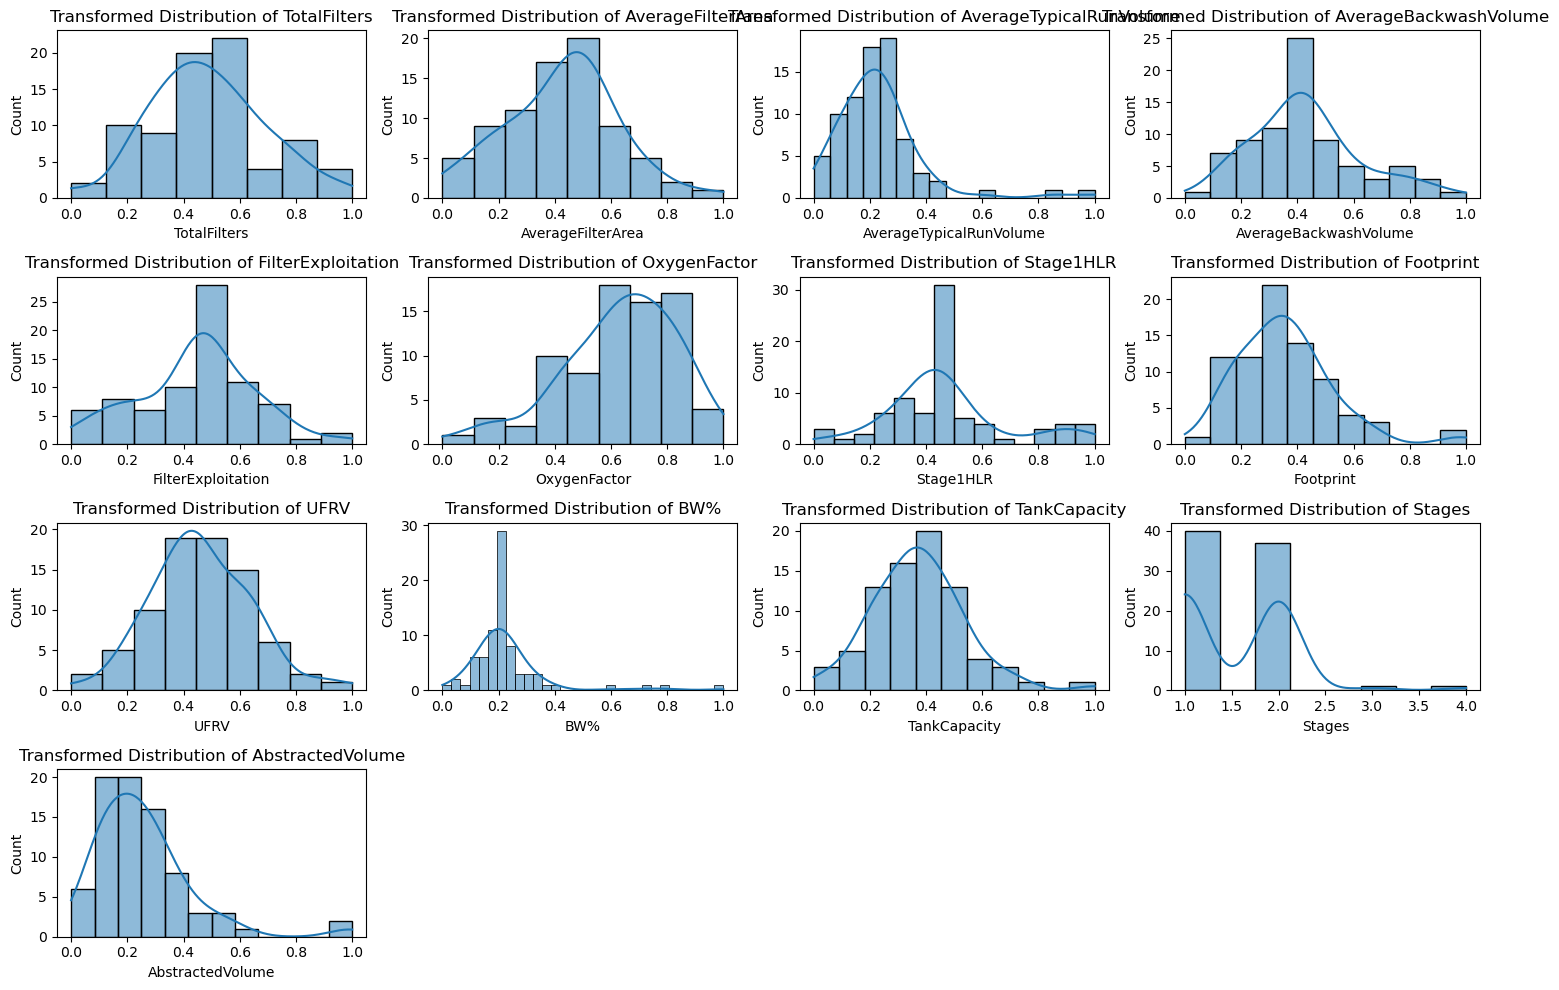

,TotalFilters,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,Stages,AbstractedVolume,PrimaryTrigger_Time,PrimaryTrigger_Volume,PrimaryTrigger_Waterlevel above filter,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,0.263158,0.100245,0.078884,0.054519,0.416917,0.610390,0.038377,0.306610,0.758179,0.009651,0.263365,1,0.021561,True,False,False,False,True,False,False,False,False,False,False,False
1,0.157895,0.076834,0.000797,0.161185,0.472130,0.399351,0.686409,0.018993,0.000000,0.649245,0.000000,2,0.052881,False,True,False,False,False,False,False,False,False,False,False,True
2,0.157895,0.300703,0.056574,0.488889,0.485718,0.880952,0.206473,0.082545,0.191375,0.059990,0.205094,2,0.059015,False,True,False,True,False,False,False,False,False,False,False,False
3,0.052632,0.314779,0.015139,0.149333,0.469758,0.767316,0.193763,0.423011,0.031447,0.059277,0.106313,1,0.013128,False,True,False,False,True,False,False,False,False,False,False,False
4,0.052632,0.003597,0.000000,0.021926,0.469758,0.150433,0.193763,0.917517,0.116106,0.049401,0.528936,1,0.000000,False,True,False,False,True,False,False,False,False,False,False,False


In [339]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 1: Visualize the distributions of the numeric features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(4, 4, i)  # Adjust based on the number of features
    sns.histplot(numeric_df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# calculate skewness
skewness = numeric_df.skew()
print("Skewness of features:\n", skewness)

# features that are significantly skewed
skewed_features = skewness[abs(skewness) > 1].index
print("\nSkewed features (absolute skewness > 1):", list(skewed_features))

# Step 3: Apply transformations to skewed features
transformed_df = numeric_df.copy()  # Create a copy for transformations

for feature in skewed_features:
    if (transformed_df[feature] > 0).all():  # Log transformation requires positive values
        transformed_df[feature] = np.log(transformed_df[feature])
        print(f"Log transformed {feature}")
    elif (transformed_df[feature] >= 0).all():  # Square root transformation
        transformed_df[feature] = np.sqrt(transformed_df[feature])
        print(f"Square root transformed {feature}")
    else:
        print(f"No transformation applied to {feature} as it contains non-positive values.")

# transformed distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(transformed_df.columns, 1):
    plt.subplot(4, 4, i)  # Adjust based on the number of features
    sns.histplot(transformed_df[column], kde=True)
    plt.title(f'Transformed Distribution of {column}')

plt.tight_layout()
plt.show()

df.head()